# Chapter 9: Unsupervised Learning Techniques

In [1]:
import numpy as np
import pandas as pd
import sklearn 

sklearn.__version__

'1.3.2'

In [2]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [3]:
from pathlib import Path

IMAGES_PATH = Path("images")

## Clustering Algorithms: k-means and DBSCAN

### K-means

In [4]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

#exact arguments of make_blobs() are not important
blob_centers = np.array([[ 0.2,  2.3], [-1.5 ,  2.3], [-2.8,  1.8],
                         [-2.8,  2.8], [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std,
                  random_state=7)

k = 5
kmeans = KMeans(n_clusters=k, n_init=10, random_state=45)
y_pred = kmeans.fit_predict(X)

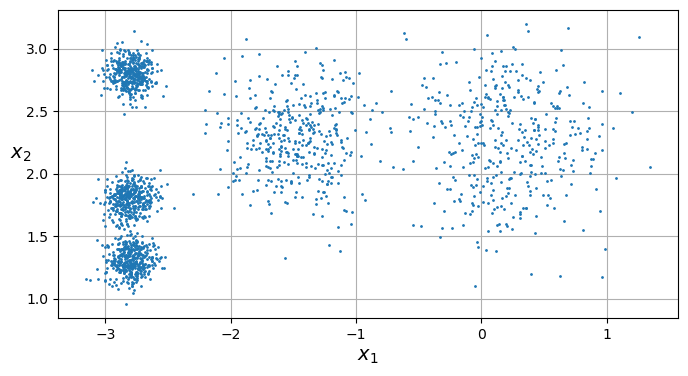

In [5]:

def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)

plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.gca().set_axisbelow(True)
plt.grid()
plt.show()

In [6]:
y_pred, y_pred is kmeans.labels_

(array([4, 0, 1, ..., 3, 1, 0]), True)

In [7]:
kmeans.cluster_centers_

array([[-2.80389616,  1.80117999],
       [ 0.20876306,  2.25551336],
       [-1.46679593,  2.28585348],
       [-2.79290307,  2.79641063],
       [-2.80037642,  1.30082566]])

In [8]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([1, 1, 3, 3])

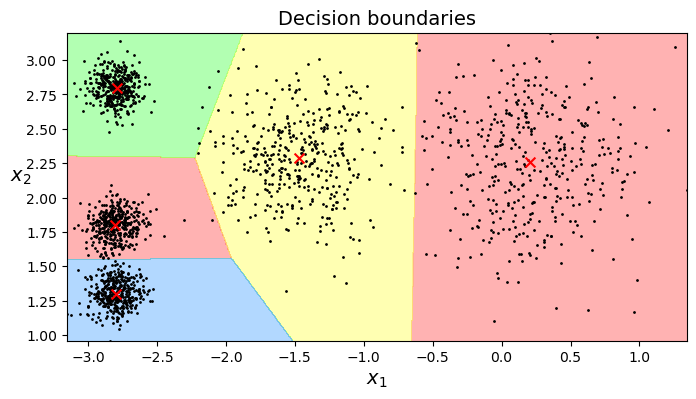

In [9]:
from matplotlib.colors import ListedColormap

# Clusters decision boundaries
def plot_data(X):
	plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2, zorder=-1)

	
def plot_decision_boundaries(clusterer, X, resolution=1000, custom_map=None, show_centroids=True):
	
	min_x1, max_x1 = X[:, 0].min(), X[:, 0].max()
	min_x2, max_x2 = X[:, 1].min(), X[:, 1].max()

	x1, x2 = np.meshgrid(np.linspace(min_x1, max_x1, resolution), np.linspace(min_x2, max_x2, resolution))
	X_new = np.c_[x1.ravel(), x2.ravel()]

	y_pred = clusterer.predict(X_new).reshape(x1.shape)
	plt.contourf(x1, x2, y_pred, alpha=0.5, cmap=custom_map, zorder=-1)
	
	plot_data(X)

	if show_centroids:
		plt.scatter(clusterer.cluster_centers_[:, 0], clusterer.cluster_centers_[:, 1], s=50, marker='x', color='r', zorder=10)

	
custom_map = ListedColormap(['#ff6666', '#ffb366', '#ffff66', '#66ff66', '#66b3ff'])

plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X, custom_map=custom_map)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$", rotation=0)
plt.title("Decision boundaries")
plt.show()

#### K-Means Variability

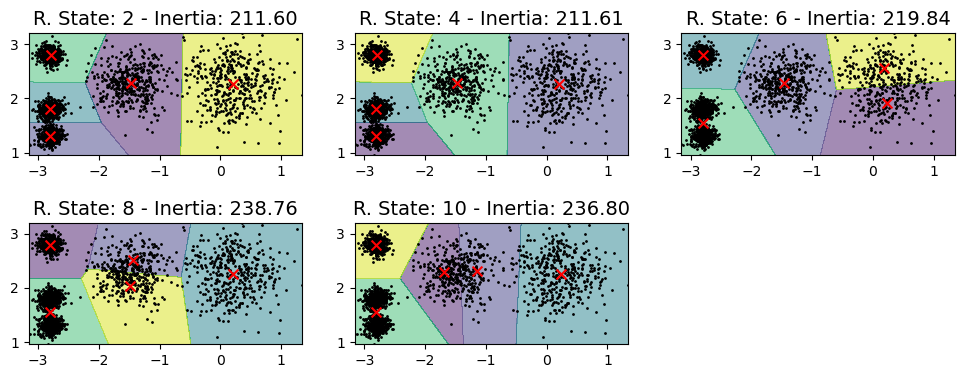

In [35]:
# Different random initializations lead to different outcomes
X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std,
                  random_state=7)
n_clusters = 5
n_init = 2
init="random"

plt.figure(figsize=(10, 4))


for i in range(2, 11, 2):
    clusterer = KMeans(n_clusters=n_clusters, init=init, n_init=n_init, random_state=i)
    clusterer.fit(X)
    plt.subplot(2, 3, i // 2)
    plot_decision_boundaries(clusterer, X)
    inertia = clusterer.inertia_
    plt.title(f"R. State: {i} - Inertia: {inertia:.2f}")


plt.tight_layout()
plt.show()


In [10]:
# Distances to the centroids
# Clusters:  					C0, C1, C2, C3, C4
# Instances 1 - Distances: 		D0, D1, D2, D3, D4
# Instances 2 - Distances: 		D0, D1, D2, D3, D4
kmeans.transform(X_new).round(2)

array([[2.81, 0.33, 1.49, 2.9 , 2.89],
       [5.81, 2.8 , 4.48, 5.85, 5.84],
       [1.21, 3.29, 1.69, 0.29, 1.71],
       [0.73, 3.22, 1.55, 0.36, 1.22]])

In [11]:
kmeans.inertia_

211.5985372581684

### Accelerated k-means with MiniBatchKMeans

### Finding the optimal number of clusters

In [12]:
from sklearn.metrics import silhouette_score

silhouette_score(X, kmeans.labels_)

0.655517642572828

c:\Users\ismae\.conda\envs\homl3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ismae\.conda\envs\homl3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ismae\.conda\envs\homl3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ismae\.conda\envs\homl3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to

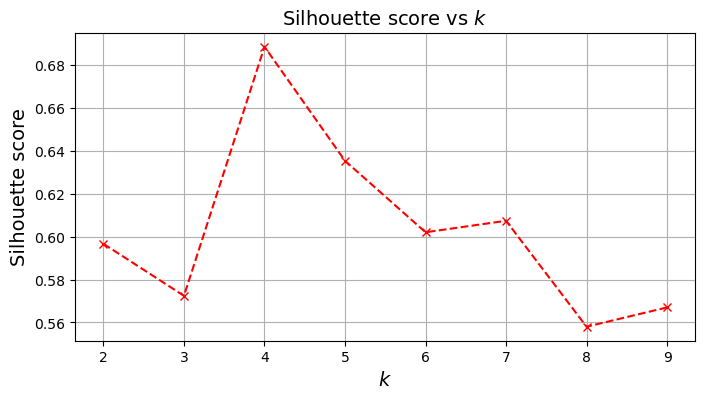

In [13]:
# Comparing silhouette scores for different values of k

silhouette_scores = []
for k in range(2, 10):
	kmeans = KMeans(n_clusters=k, random_state=42)
	kmeans.fit(X)

	silhouette_scores.append(silhouette_score(X, kmeans.labels_))

plt.figure(figsize=(8, 4))
plt.plot(range(2, 10), silhouette_scores, "rx--")

plt.xlabel("$k$")
plt.ylabel("Silhouette score", rotation=90)
plt.title("Silhouette score vs $k$")
plt.grid()

plt.show()

### Limits of k-means

### Using Clustering for Image Segmentation

In [14]:
import urllib.request

homl3_root = "https://github.com/ageron/handson-ml3/raw/main/"
filename = "ladybug.png"
filepath = IMAGES_PATH / filename
if not filepath.is_file():
    print("Downloading", filename)
    url = f"{homl3_root}/images/unsupervised_learning/{filename}"
    urllib.request.urlretrieve(url, filepath)

In [15]:
import PIL

image = np.asarray(PIL.Image.open(filepath))
image.shape

(533, 800, 3)

In [16]:
X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=8, n_init=10, random_state=42).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

In [17]:
segmented_imgs = []

n_colors = (20, 15, 10, 8, 6, 5, 4, 2)
for n_clusters in n_colors:
	kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto').fit(X)
	segmented_img = kmeans.cluster_centers_[kmeans.labels_]
	segmented_imgs.append(segmented_img.reshape(image.shape))

c:\Users\ismae\.conda\envs\homl3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ismae\.conda\envs\homl3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ismae\.conda\envs\homl3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ismae\.conda\envs\homl3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to

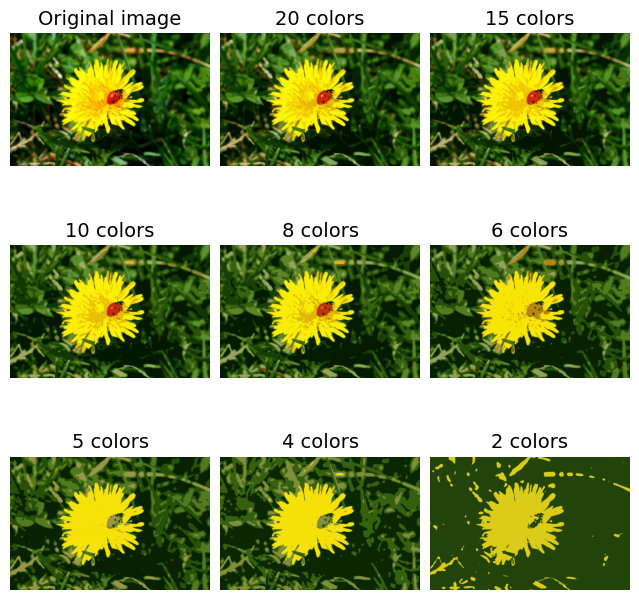

In [18]:
plt.figure(figsize=(8, 8))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(331)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
	plt.subplot(3, 3, idx+2)
	plt.imshow(segmented_imgs[idx]/255)
	plt.title(f"{n_clusters} colors")
	plt.axis('off')

### Using Clustering for Semi-supervised Learning

In [36]:
from sklearn.datasets import load_digits

X_digits, y_digits = load_digits(return_X_y=True)

idx_split = 1400
X_train, y_train = X_digits[:idx_split], y_digits[:idx_split]
X_test, y_test = X_digits[idx_split:], y_digits[idx_split:]

In [37]:
# Suppose we only have n labeled instances
# Using a Logistic Regression to get baseline performance
from sklearn.linear_model import LogisticRegression

n_labeled = 50
log_reg = LogisticRegression(max_iter = 10_000, random_state=42)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])

# Getting the accuracy (on the test set)
print(f"Accuracy with {n_labeled} labeled instances:")
print(log_reg.score(X_test, y_test))

# 0.7581863979848866

Accuracy with 50 labeled instances:
0.7481108312342569


In [ ]:
# If we had all the labels
log_reg_all_labels = LogisticRegression(max_iter = 10_000, random_state=42)
log_reg_all_labels.fit(X_train, y_train)
print("Accuracy with all labels:")
print(log_reg_all_labels.score(X_test, y_test))
# 0.906801007556675

Accuracy with all labels:
0.906801007556675


In [42]:
# Using KMeans to get more labels

# First we want to get the '50 representative images' - images closest to the centroids

np.random.seed(42)
k = 50
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digit_idx]

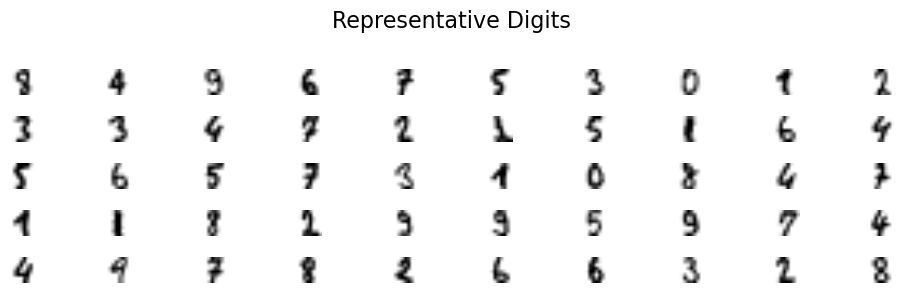

In [44]:
# Visualizing the representative digits
plt.figure(figsize=(10, 3))
for idx, digit in enumerate(X_representative_digits):
    plt.subplot(5, 10, idx + 1)
    plt.imshow(digit.reshape(8, 8), cmap="binary", interpolation="bilinear")
    plt.axis("off")
plt.suptitle("Representative Digits", fontsize=16)
plt.tight_layout()
plt.show()

In [45]:
# Labeling the representative digits manually

y_representative_digits = np.array([
    8, 4, 9, 6, 7, 5, 3, 0, 1, 2,
    3, 3, 4, 7, 2, 1, 5, 1, 6, 4,
    5, 6, 5, 7, 3, 1, 0, 8, 4, 7,
    1, 1, 8, 2, 9, 9, 5, 9, 7, 4, 
    4, 9, 7, 8, 2, 6, 6, 3, 2, 8])

In [47]:
# Now we can retrain the model using the representative digits and their labels
log_reg = LogisticRegression(max_iter=10_000, random_state=42)
log_reg.fit(X_representative_digits, y_representative_digits)

print("Accuracy with representative digits:")
print(log_reg.score(X_test, y_test))

# 0.8413098236775819
# Much better performance than with 50 random labeled instances

Accuracy with representative digits:
0.8413098236775819


In [48]:
# Let's try propagating the labels to the other instances in the same cluster

y_train_propagated = np.empty(len(X_train), dtype=np.int64)
for i in range(k):
    y_train_propagated[kmeans.labels_ == i] = y_representative_digits[i]

log_reg = LogisticRegression(max_iter=10_000, random_state=42)
log_reg.fit(X_train, y_train_propagated)

print("Accuracy with propagated labels:")
print(log_reg.score(X_test, y_test))

# 0.871536523929471
# Better performance again

Accuracy with propagated labels:
0.8639798488664987


In [54]:
# Removing the 1% most distant to the centroids

percentile_closest = 99

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [55]:
log_reg = LogisticRegression(max_iter=10_000, random_state=42)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)
log_reg.score(X_test, y_test)

0.8589420654911839

In [56]:
# Accuracy of propagated labels:
(y_train_partially_propagated == y_train[partially_propagated]).mean()
# 0.96

0.9548148148148148

## DBSCAN

In [57]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [58]:
dbscan.labels_[:10]

array([ 0,  2, -1, -1,  1,  0,  0,  0,  2,  5], dtype=int64)

In [59]:
dbscan.core_sample_indices_[:20]

array([ 0,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21,
       22, 23, 24], dtype=int64)

In [60]:
dbscan.components_[:10]

array([[-0.02137124,  0.40618608],
       [-0.84192557,  0.53058695],
       [ 0.58930337, -0.32137599],
       [ 0.29248724, -0.20696309],
       [-0.02637836,  0.44766267],
       [ 1.6201408 , -0.28758856],
       [ 1.26718285, -0.40793471],
       [ 0.87418608,  0.50781041],
       [ 0.3322007 , -0.19032202],
       [ 1.952812  ,  0.22552333]])

In [61]:
def plot_dbscan_results(X, labels):
    """
    Plots the results of DBSCAN clustering.

    Parameters:
    - X: numpy.ndarray, the dataset used for clustering.
    - labels: numpy.ndarray, the cluster labels assigned by DBSCAN.
    """
    plt.figure(figsize=(8, 6))

    # Plot the points with their cluster labels
    unique_labels = set(labels)
    for label in unique_labels:
        if label == -1:
            # Anomaly points
            color = 'k'
            marker = 'x'
            label_name = "Anomaly"
        else:
            # Cluster points
            color = plt.cm.jet(float(label) / max(unique_labels))
            marker = 'o'
            label_name = f"Cluster {label}"
        
        plt.scatter(X[labels == label, 0], X[labels == label, 1], 
                    c=[color], marker=marker, label=label_name, s=10)

    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)
    plt.title("DBSCAN Clustering Results")
    plt.legend(loc="best", markerscale=2)
    plt.grid()
    plt.show()

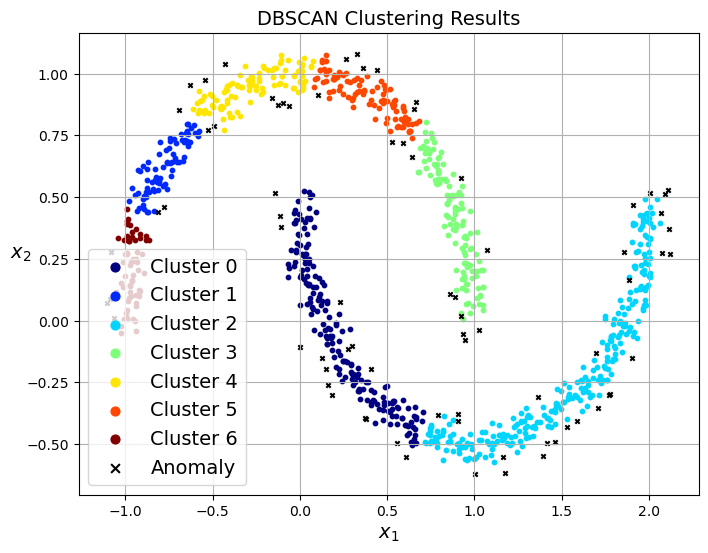

In [189]:
plot_dbscan_results(X, dbscan.labels_)

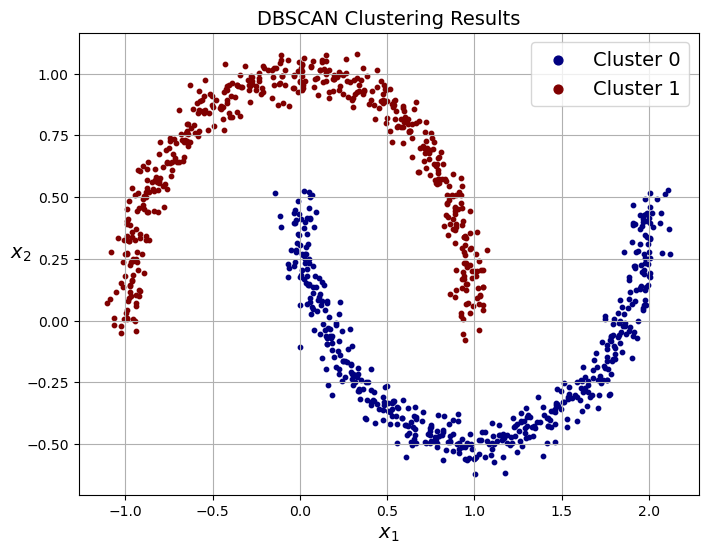

In [62]:
# Changing dbscan parameters
dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan.fit(X)

plot_dbscan_results(X, dbscan.labels_)
# Much better result

DBSCAN does not have a .predict() method. However, we can implement this easily choosing our prefered algorithm.
For KNClassifier, for example:

In [63]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

In [64]:
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(X_new)

array([1, 0, 1, 0], dtype=int64)

In [65]:
knn.predict_proba(X_new)

array([[0.18, 0.82],
       [1.  , 0.  ],
       [0.12, 0.88],
       [1.  , 0.  ]])

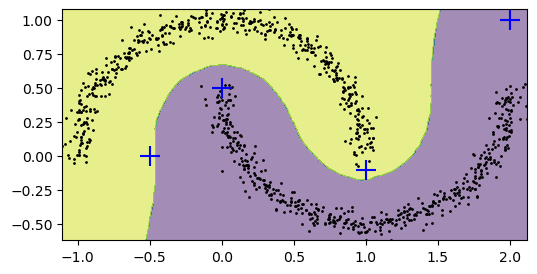

In [66]:
plt.figure(figsize=(6, 3))
plot_decision_boundaries(knn, X, show_centroids=False)
plt.scatter(X_new[:, 0], X_new[:, 1], c="b", marker="+", s=200, zorder=10)
plt.show()

## Other Clustering Algorithms

## Gaussian Mixtures

In [67]:
# Generate the data

X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

In [68]:
from sklearn.mixture import GaussianMixture

In [70]:
# Train the Gaussian Mixture Model
gmm = GaussianMixture(n_components=3, n_init=10, random_state=42)
gmm.fit(X)

GaussianMixture(n_components=3, n_init=10, random_state=42)

In [74]:
# Take a look at the parameters estimated by the algorithm (Expectation Maximization)

gmm.weights_ 

array([0.40005972, 0.20961444, 0.39032584])

In [72]:
gmm.means_

array([[-1.40764129,  1.42712848],
       [ 3.39947665,  1.05931088],
       [ 0.05145113,  0.07534576]])

In [73]:
gmm.covariances_

array([[[ 0.63478217,  0.72970097],
        [ 0.72970097,  1.16094925]],

       [[ 1.14740131, -0.03271106],
        [-0.03271106,  0.95498333]],

       [[ 0.68825143,  0.79617956],
        [ 0.79617956,  1.21242183]]])

In [75]:
# Convergence status and number of iters
gmm.converged_, gmm.n_iter_

(True, 4)

In [77]:
# Predict cluster memberships
gmm.predict(X)

array([2, 2, 0, ..., 1, 1, 1], dtype=int64)

In [79]:
# Predict probability of each cluster
gmm.predict_proba(X).round(2)

array([[0.  , 0.02, 0.98],
       [0.  , 0.02, 0.98],
       [1.  , 0.  , 0.  ],
       ...,
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ]])

In [81]:
# We can obtain new samples
X_new, y_new = gmm.sample(6)

print(X_new)
# Samples are generated according to the learned distribution and ordered by cluster
print(y_new)

[[-2.32491052  1.04752548]
 [-1.16654983  1.62795173]
 [ 1.84860618  2.07374016]
 [ 3.98304484  1.49869936]
 [ 3.8163406   0.53038367]
 [ 0.38079484 -0.56239369]]
[0 0 1 1 1 2]


In [84]:
# Density scores
gmm.score_samples(X).round(2)

array([-2.61, -3.57, -3.33, ..., -3.51, -4.4 , -3.81])

In [87]:
# This outputs the log of the PDF at each location
# Taking the exponential gives the actual PDF values

# Let's check the integral (sum) of the PDF
step = 1/100
# print(X.min(), X.max()) -- -3.5, 6.5 
grid = np.arange(-10, 10, step)
x_grid, y_grid = np.meshgrid(grid, grid)
full_space = np.vstack([x_grid.ravel(), y_grid.ravel()]).T

# Get the pdf value at each point in space
pdf = np.exp(gmm.score_samples(full_space))

# Get the probabilities by multiplying with the area of each grid cell
pdf_probas = pdf * step*step 

# Get the sum
pdf_probas.sum()

0.9999999999225089

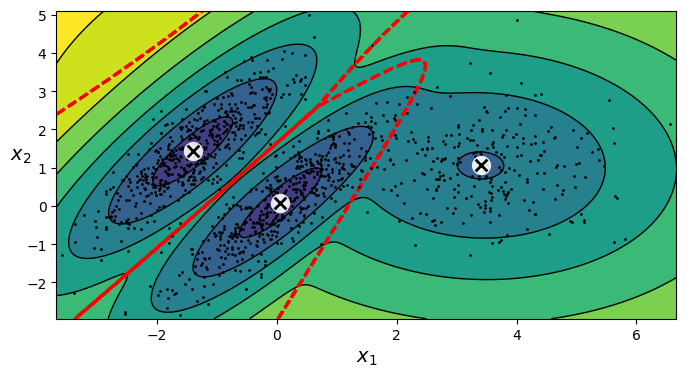

In [88]:
# Plot the decision boundaries

from matplotlib.colors import LogNorm


def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')
    
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$")
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)

plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gmm, X)


plt.show()

In [89]:
# Changing the covariance type

gmm_full = GaussianMixture(n_components=3, n_init=10, covariance_type="full", random_state=42)
gmm_tied = GaussianMixture(n_components=3, n_init=10, covariance_type="tied", random_state=42)
gmm_spherical = GaussianMixture(n_components=3, n_init=10, covariance_type="spherical", random_state=42)
gmm_diag = GaussianMixture(n_components=3, n_init=10, covariance_type="diag", random_state=42)

gmm_full.fit(X)
gmm_tied.fit(X)
gmm_spherical.fit(X)
gmm_diag.fit(X)

GaussianMixture(covariance_type='diag', n_components=3, n_init=10,
                random_state=42)

In [100]:
def compare_gmm(gm1, gm2, X):
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    plot_gaussian_mixture(gm1, X)
    plt.title(f"Covariance Type: {gm1.covariance_type}")

    plt.subplot(1, 2, 2)
    plot_gaussian_mixture(gm2, X)
    plt.title(f"Covariance Type: {gm2.covariance_type}")

    plt.show()

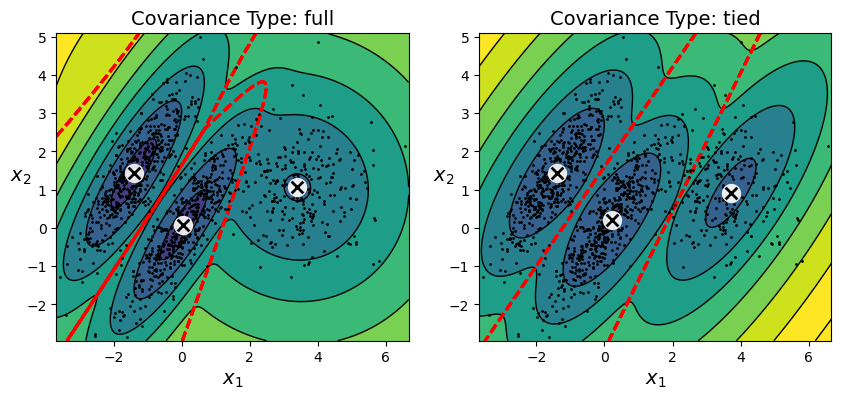

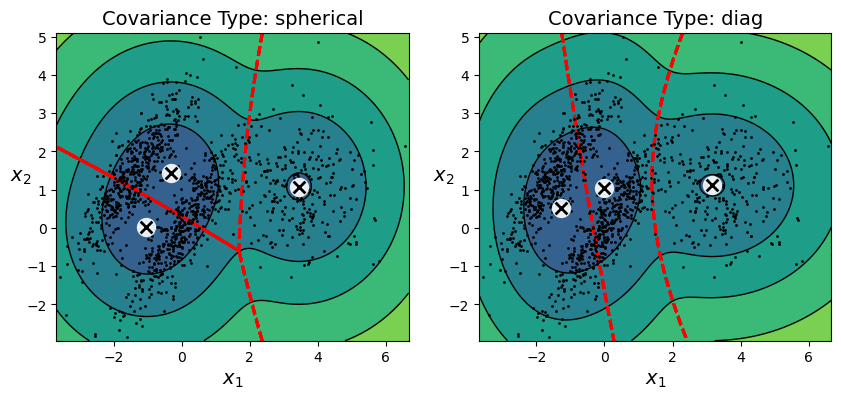

In [101]:
compare_gmm(gmm_full, gmm_tied, X)
compare_gmm(gmm_spherical, gmm_diag, X)

## Anomaly Detection with Gaussian Mixtures

In [104]:
# We can consider an anomaly if it is in a region with low density

densities = gmm.score_samples(X)
density_threshold = np.percentile(densities, 2)
anomalies = X[densities < density_threshold]

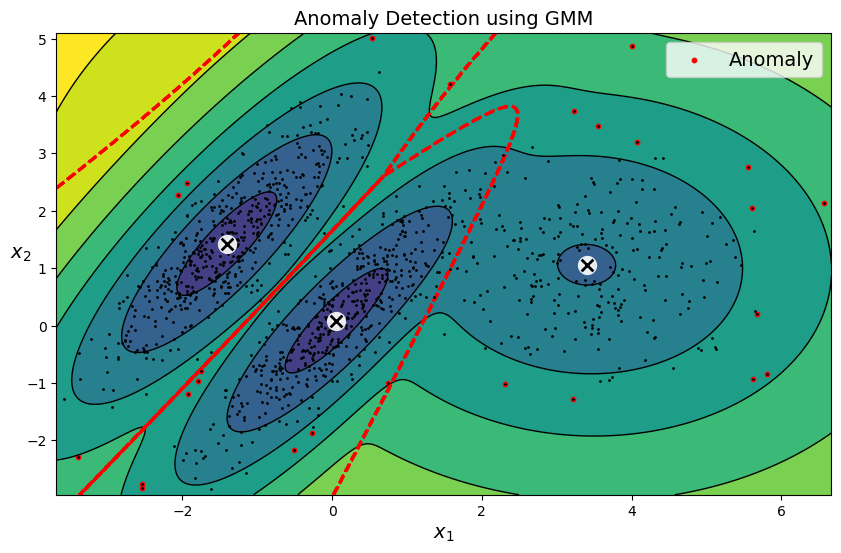

In [105]:
#   Visualize the anomalies

plt.figure(figsize=(10, 6))
plot_gaussian_mixture(gmm, X)
plt.scatter(anomalies[:, 0], anomalies[:, 1], c='red', s=10, label='Anomaly')
plt.title("Anomaly Detection using GMM")
plt.legend()
plt.show()

## Selecting the Number of Clusters

Inertia or Silhoutte score is not reliable when clusters are not spherical or have different sizes

We need to use another criteria.

We want the model that minimizes a theoretical information criterion.

- BIC (Bayesian Information Criterion)

${BIC} = {\log(m)p - 2\log({\hat L})}$

- AIC (Akaike Information Criterion)

${AIC} = 2p - 2\log(\hat L)$

* $m$ is the number of instances.
* $p$ is the number of parameters learned by the model.
* $\hat L$ is the maximized value of the likelihood function of the model. This is the conditional probability of the observed data $\mathbf{X}$, given the model and its optimized parameters.

In [106]:
gmm.bic(X), gmm.aic(X)

(8189.733705221636, 8102.508425106598)

In [107]:
# Manually computing the BIC and AIC scores:

n_clusters = 3
n_dims = 2
n_params_for_weights = n_clusters - 1
n_params_for_means = n_clusters * n_dims
n_params_for_covariance = n_clusters * n_dims * (n_dims + 1) // 2
n_params = n_params_for_weights + n_params_for_means + n_params_for_covariance

max_log_likelihood = gmm.score(X) * len(X) # log(L^)
bic = np.log(len(X)) * n_params - 2 * max_log_likelihood
aic = 2 * n_params - 2 * max_log_likelihood
print(f"bic = {bic}")
print(f"aic = {aic}")
print(f"n_params = {n_params}")

bic = 8189.733705221636
aic = 8102.508425106598
n_params = 17


In [109]:
# Compare AIC and BIC scores for different ks

gmm_models = [GaussianMixture(n_components=k, n_init=10, random_state=42).fit(X) for k in range(1, 15)]
aic_scores = [gmm.aic(X) for gmm in gmm_models]
bic_scores = [gmm.bic(X) for gmm in gmm_models]

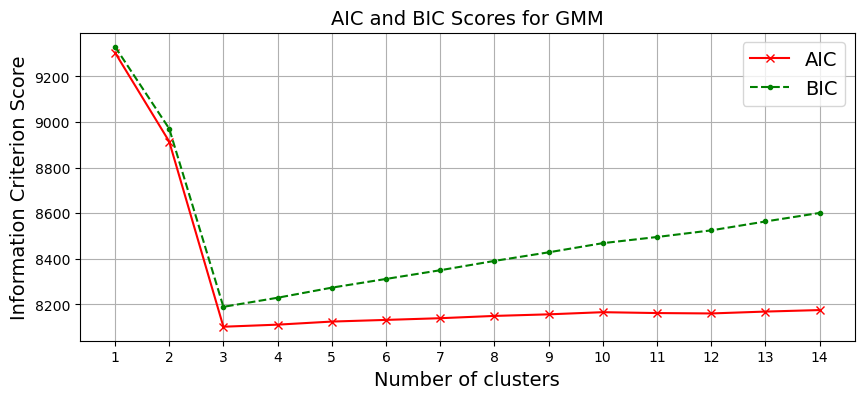

In [114]:
# Visualizing the scores as functions of k
plt.figure(figsize=(10, 4))
plt.plot(range(1, 15), aic_scores, 'rx-', label='AIC')
plt.plot(range(1, 15), bic_scores, 'g.--', label='BIC')

plt.xticks(range(1, 15))

plt.xlabel("Number of clusters")
plt.ylabel("Information Criterion Score")

plt.title("AIC and BIC Scores for GMM")
plt.grid()
plt.legend()
plt.show()

# Minimum AIC and BIC at k=3

## Bayesian Gaussian Mixture Modelts

In [115]:
# BGMM can set the weights of unnecessary clusters to zero (or close)

from sklearn.mixture import BayesianGaussianMixture

bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X)

BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)

In [119]:
bgm.weights_.round(2)

array([0.4 , 0.21, 0.  , 0.4 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

In [122]:
# Now let's try the moon dataset

X_moon, y_moon = make_moons(n_samples=1000, noise=0.05, random_state=42)

bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X_moon)

c:\Users\ismae\.conda\envs\homl3\lib\site-packages\sklearn\mixture\_base.py:268: ConvergenceWarning: Initialization 10 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)

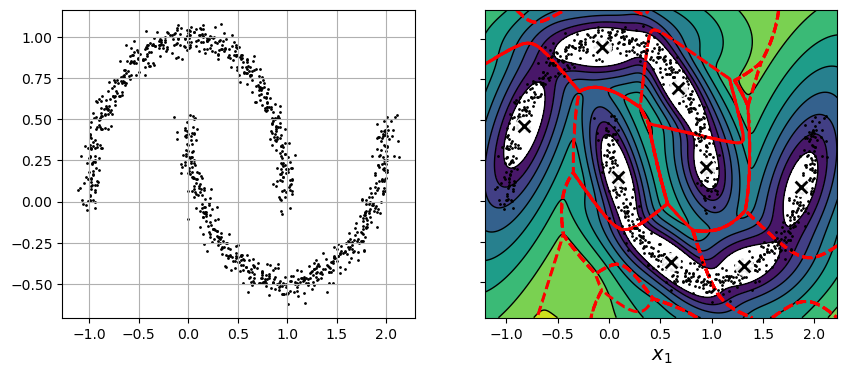

In [126]:
plt.figure(figsize=(10, 4))
plt.subplot(121)
plot_data(X_moon)
plt.grid()

plt.subplot(122)
plot_gaussian_mixture(bgm, X_moon, show_ylabels=False)

plt.show()